In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# STA 5703 ASSIGNMENT 2

## Data: A CSV file entitled “HousingPrice” with a numerical target variable “SalePrice”.  There is a variable description file entitled “HousingPrice_VARDESP” and you can find simple description of all variables in this data set.  The missing value symbol used in this data set is “NA” for both numerical or character predictors.

In [5]:
df=pd.read_csv(r'C:\Users\chat2\Downloads\HousingPrice.csv')

In [6]:
df.head(5)
df.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### To build a simple linear regression model use “GrLivArea” as the only predictor to predict the “SalePrice”.  Answer the following questions based on your model: Y ̂= β ̂_0+β ̂1×X, where Y represents the “SalePrice” and X represents the predictor “GrLivArea”


### Problem 1.1 (1 Point) Is there is a relationship between “GrLivArea” and “SalePrice” based the test of the following hypothesis 


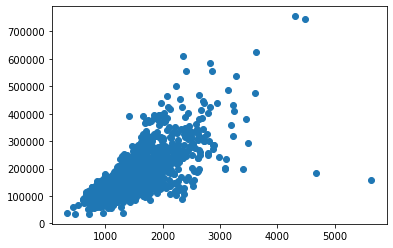

In [7]:
plt.scatter(df['GrLivArea'],df['SalePrice'])


In [8]:
from scipy.stats import ttest_rel,pearsonr,spearmanr
v,p=ttest_rel(df['SalePrice'],df['GrLivArea'])
v,c=pearsonr(df['GrLivArea'],df['SalePrice'])
v,c1=spearmanr(df['SalePrice'],df['GrLivArea'])
p

0.0

#### Solution 1.1 - From the scatter plot we can infer that there is a linear relationship between grLivArea and SalePrice. From the given question we consider that null Hypothesis is B1=0 and Alternate Hypothesis is B0 not equal to 0. We do ttest and find P value. If p value is very less we can reject null hypothesis. We get P value close to 0,So we can reject null hypothesis and can confirm that Bnot equal to 0 and there is a relationship exist between SalePrice and GrLiv Area.




### Problem 1.2 (1 Point) How strong is the relationship between “GrLivArea” and “SalePrice” based the approximately 95% confidence interval (■(β ̂_1-2×S_(β ̂_1 ),&β ̂_1+2×S_(β ̂_1 ) )) .

In [8]:
np.corrcoef(df['SalePrice'],df['GrLivArea'])

array([[1.        , 0.70862448],
       [0.70862448, 1.        ]])

In [9]:
df.GrLivArea.corr(df.SalePrice,method="pearson")


0.7086244776126522

#### Solution 1.2 - We find the Correlation coefficient between SalePrice and GrLivArea. It is around 0.7086. We can conclude that it is 0.7086 times influential.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Problem 1.3 (1 Point) What is the predicted value for a house with 2,000 “GrLivArea”?  What is the predicted value if the house “GrLivArea” is 2,500?

In [119]:
X=df['GrLivArea']
Y=df['SalePrice']
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.2)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape
#xtrain.values.reshape(-1,1).shape
#linear model always accept the parameters to be 2D array.

((1168,), (1168,), (292,), (292,))

In [120]:
xtrain=xtrain.values.reshape(-1,1)
xtest=xtest.values.reshape(-1,1)
ytrain=ytrain.values.reshape(-1,1)
regressor= LinearRegression()
regressor.fit(xtrain,ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pred=regressor.predict(xtest)
op_2000=regressor.predict([[2000]])
op_2500=regressor.predict([[2500]])
print(op_2000,op_2500)
#print(regressor.coef_)

[[233162.23613516]] [[286456.43117814]]


#### Solution 1.3 - For GrLivArea = 2000 the price is predicted to be 233162.236 and for GrLivArea = 2500 the price is predicted to be 286456.431 by my Linear Regression Model

### Problem 1.4 (1 Point) Produce a residual plot.

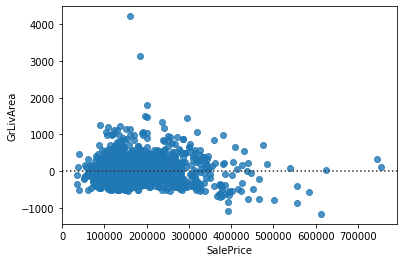

In [13]:
sns.residplot(df['SalePrice'],df['GrLivArea'])

### Problem 1.5 (1 Point) What is the percentage of variability of “SalePrice” explained by your linear regression model, I.e., the R^2 of your model.

In [14]:
r2=r2_score(ytest,y_pred)
r2

0.6031777758487489

#### Solution 1.5 - r2 score for the model is found  to be 0.603177

### Problem 1.6 (1 Point) What is the Pearson correlation coefficient between “GrLivArea” and “SalePrice” based on your model.

In [154]:
df.GrLivArea.corr(df.SalePrice,method="pearson")


0.7086244776126522

#### Solution 1.6 -  Pearson Correlation coefficent is calculated to be 0.70862

### Part-2

In [11]:
#Label encoder converts a string to numerics (1,2,3..), which is thereby used by one hot encoder as one hot encoder cannot convert strings to numerics directly
# One hot encoder identifies the present variables and labels them 1 if present and the remaining cols as 0 
# theone hot encoder stores in the array format, which is therefore requiredto be reshaped into the matrix format (reshape and fit_transform function are used to attain this purpose)
#

df2=df[['ExterQual','SalePrice']]
cat=df2['ExterQual']
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
le=LabelEncoder()
df2['ExterQual']=le.fit_transform(df2['ExterQual'])
enc=OneHotEncoder(sparse=False, handle_unknown="ignore")
X_array=df2['ExterQual'].values
X_array_encoded=X_array.reshape(len(X_array),1)
df9=enc.fit_transform(X_array_encoded)
dp=pd.DataFrame(df9,columns=["Ex","Fa","Gd","TA"])
result=pd.concat([dp,df2.iloc[:,1:3]],axis=1)
result




C:\Users\chat2\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Ex,Fa,Gd,TA,SalePrice
0,0.0,0.0,1.0,0.0,208500
1,0.0,0.0,0.0,1.0,181500
2,0.0,0.0,1.0,0.0,223500
3,0.0,0.0,0.0,1.0,140000
4,0.0,0.0,1.0,0.0,250000
...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,175000
1456,0.0,0.0,0.0,1.0,210000
1457,1.0,0.0,0.0,0.0,266500
1458,0.0,0.0,0.0,1.0,142125


In [12]:
cat_columns = ["ExterQual"]
pd.get_dummies(df2,columns=cat_columns)

,SalePrice,ExterQual_0,ExterQual_1,ExterQual_2,ExterQual_3
0,208500,0,0,1,0
1,181500,0,0,0,1
2,223500,0,0,1,0
3,140000,0,0,0,1
4,250000,0,0,1,0
...,...,...,...,...,...
1455,175000,0,0,0,1
1456,210000,0,0,0,1
1457,266500,1,0,0,0
1458,142125,0,0,0,1


### Problem 2.1 (1 Point) Suppose that we hold all three other categories “Fa”, Gd”, and “TA” to be constant, what is the effect of “Ex” on the “SalePrice”, i.e., to build a simple regression model  Y ̂= β ̂_0+β ̂_1×"EX\"" and the effect is the coefficient β ̂_1.  Report the confidence interval (■(β ̂_1-2×S_(β ̂_1 ),&β ̂_1+2×S_(β ̂_1 ) )) to support your finding.

In [18]:
df2
from scipy.stats import sem

Problem 2.1 (1 Point) Suppose that we hold all three other categories “Fa”, Gd”, and “TA” to be constant, what is the effect of “Ex” on the “SalePrice”, i.e., to build a simple regression model Y ̂= β ̂_0+β ̂_1×""EX\""  and the effect is the coefficient β ̂_1.  Report the confidence interval (■(β ̂_1-2×S_(β ̂_1 ),&β ̂_1+2×S_(β ̂_1 ) )) to support your finding.

In [16]:
Xa=result.iloc[0]
Ya=result['SalePrice']


Ex                0.0
Fa                0.0
Gd                1.0
TA                0.0
SalePrice    208500.0
Name: 0, dtype: float64

### Problem 2.2 (1 Point) Suppose that we fit a model to obtain the equation Y ̂= β ̂_0+β ̂_1×""EX\""+ β ̂_2×"Fa" + β ̂_3×"Gd".   Report all three coefficients β ̂_1, β ̂_2, and β ̂_3.

In [140]:
Xb=result.iloc[:,0:3]
Yb=result['SalePrice']
xtrain_a,xtest_a,ytrain_a,ytest_a= train_test_split(Xb,Yb,test_size=0.2)
import statsmodels.regression.linear_model as sm
import statsmodels.api as sa1
Xb=sa1.add_constant(Xb)


In [141]:
regressor_OLS=sm.OLS(Yb, Xb).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     443.3
Date:                Wed, 05 Feb 2020   Prob (F-statistic):          1.44e-204
Time:                        23:35:14   Log-Likelihood:                -18070.
No. Observations:                1460   AIC:                         3.615e+04
Df Residuals:                    1456   BIC:                         3.617e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.443e+05   1909.966     75.573      0.000    1.41e+05    1.48e+05
Ex           2.23e+05   8197.976     27.204      0.000    2.07e+05    2.39e+05
Fa         -5.636e+04   1.55e+04     -3.640      0.000   -8.67e+04    -2.6e+04
Gd          8.729e+04   3228.100     27.041      0.000     8.1e+04    9.36e+04
==============================================================================
Omnibus:                      597.637   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5703.231
Skew:                           1.641   Prob(JB):                         0.00
Kurtosis:                      12.109   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Sol 2.1: Confidence Interval is in range (1.41e+05	1.48e+05)

In [142]:
print('Parameters: ', regressor_OLS.params)

Parameters:  const    144341.313466
Ex       223019.648073
Fa       -56356.099180
Gd        87292.196780
dtype: float64


#### Solution 2.2 - From OLS Model fitting we can obtain the coefficient of B1,B2,B3 as 367360.961538,87985.214286,231633.510246

### Problem 2.3 (1 Point)- Based on your reading of the text book, can you explain what do the three regression coefficients in Problem 2.2 mean?

#### Solution - 2.3 From our OLS(Ordinary Least Square) model  we get the regression coefficient of the label encoded features. We can infer that the the positive coefficient means the variable is directly propotional to the target variable. We can find that in this case all three coefficeint is positive which highly influences the target varibale. For eg. 'Ex' has coefficient of 367360 pprox, which states that for a single unit increase or presence of Ex varies or increases the target( Saleprice) by 367360.

### Problem 2.4 (1 Point) - What is the percentage of variability of “SalePrice” explained by your linear regression model in Problem 2.2, I.e., the R^2 of your model.

In [160]:

print('Parameters: ', regressor_OLS.params)
print('R2: ', regressor_OLS.rsquared)


Parameters:  Ex    367360.961538
Fa     87985.214286
Gd    231633.510246
dtype: float64
R2:  0.5843990159751673


### Solution 2.4 -  R2 of the this OLS Model is found out to be 0.5843

### Problem 2.5 (1 Point) - Can you calculate the Pearson coefficient between “SalePrice” and “ExterQual”?  Explain

In [130]:
# from scipy.stats import ttest_rel,pearsonr,spearmanr
# v_,c_=pearsonr(df['ExterQual'],df['SalePrice'])

#### Solution 2.5 - We cannot find pearson correlation coefficient between vaiables ExterQual and SalePrice as ExterQual is a categorical varibale and we cannot determine numerical correlation factor between a categorical column and numerical target column. We can find pearson correlation when it is label encoded.

### Problem 2.6 (1 Point) -  What is the difference between a house with “Ex” “ExterQual” and “Gd” “ExtewrQual” when all other variables are the same?  

#### Sol 2.6 :  Difference between the house with Ex and Gd is difference when Ex is 0 and vice versa so when B1 = 0 and B2 not equal to 0band when B1 not equal to 0 and B2 equal to 0
#### Hence it is Difference between Coefficent = 135727

## Problem 3

### Modeling Part III (8 Points) Build a multiple regression model use the data set “HousingPrice”.
Use all observations as training data set to build this multiple regression model.  After the competition of your model, you need to report the following:


In [98]:
#Correlation with output variable
cor = df.corr()
cor_target = abs(cor["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features.sort_values(ascending=False)
final_equation=pd.DataFrame(data=df,columns=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','SalePrice'])



OverallQual    0
GrLivArea      0
GarageCars     0
GarageArea     0
TotalBsmtSF    0
SalePrice      0
dtype: int64

### Problem 3.1 (2 Points) The complete Regression Equation.

In [113]:
X=final_equation.iloc[:,0:5]
Y=final_equation['SalePrice']
xtrain_a,xtest_a,ytrain_a,ytest_a= train_test_split(X,Y,test_size=0.2,random_state=42)
#import statsmodels.regression.linear_model as sm
import statsmodels.api as sa
X=sa.add_constant(X)
xtest_a=sa.add_constant(xtest_a)
regressor_OLS_final=sm.OLS(Y, X).fit()
ols_pred=regressor_OLS_final.predict(xtest_a)
regressor_OLS_final.summary()
xtest_a

,const,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
892,1.0,6,1068,1,264,1059
1105,1.0,8,2622,2,712,1463
413,1.0,5,1028,2,360,1008
522,1.0,6,1664,2,420,1004
1036,1.0,9,1620,3,912,1620
...,...,...,...,...,...,...
479,1.0,4,1131,2,672,907
1361,1.0,7,1530,2,430,1530
802,1.0,7,1456,2,410,728
651,1.0,4,1510,1,296,755


In [95]:

print('Parameters: ', regressor_OLS_final.params)
print('R2: ', regressor_OLS_final.rsquared)

Parameters:  const         -99072.050386
OverallQual    23635.007412
GrLivArea         45.345823
GarageCars     14544.315409
GarageArea        17.133393
TotalBsmtSF       31.501475
dtype: float64
R2:  0.7611083041001819


#### Solution 3.1 - The equation is determined to be     
#### Y = 23635.007412*(OverallQual)+45.345823*(GrLivArea)+14544.315409*(GarageCars)+17.133393(GarageArea)+31.501475(TotalBsmtSF)-99072.050386

In [96]:
from statsmodels.regression.linear_model import RegressionResults
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(ytest_a,ols_pred)
r2_1=r2_score(ytest_a,ols_pred)
adjr2=RegressionResults.rsquared_adj(regressor_OLS_final)
#mse=RegressionResults.mse_model(regressor_OLS_final)
print(mse1,adjr2)
print(r2_1)
#xtest_a.iloc[:,1:]

1538888314.814493 0.7602868058336764
0.7993712036167968


#### Solution 3.2
#### Mean Square Error - 1538888314.814493
#### Ajusted R-square - 0.7602868058336764
#### R2 score - 0.799371203616796845

### Problem 3.3 (2 Points) Produce a residual plot with the residuals as the Y-Axis and the predictor “GrLivArea” as the X-Axis.  Does your model fit this data well?  Answer this question based on this residual plot.

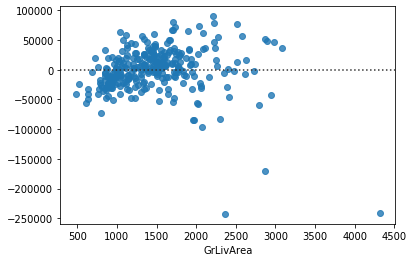

In [122]:
residuals=regressor_OLS_final.predict(xtest_a)-ytest_a
sns.residplot(xtest_a['GrLivArea'],residuals)
#model_df['GrLivArea']


####  The residual plot seems to be not symmetric about the axis and clusterd towards the centre and has few outliers. Hence it fits the model well

### Problem 3.4 (1 Point) Produce another residual plot with the residual as the Y-Axis and “SalePrice” as the X-axis.

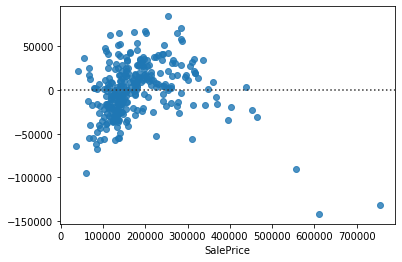

In [127]:
residuals=regressor_OLS_final.predict(xtest_a)-ytest_a
sns.residplot(ytest_a,residuals)


### Problem 3.5 (1 Point) Explain how you handle all data problems including missingness and skewness of all predictors used in your model.

In [132]:
final_equation.isna().sum()

OverallQual    0
GrLivArea      0
GarageCars     0
GarageArea     0
TotalBsmtSF    0
SalePrice      0
dtype: int64

#### There is no missing values in the features.

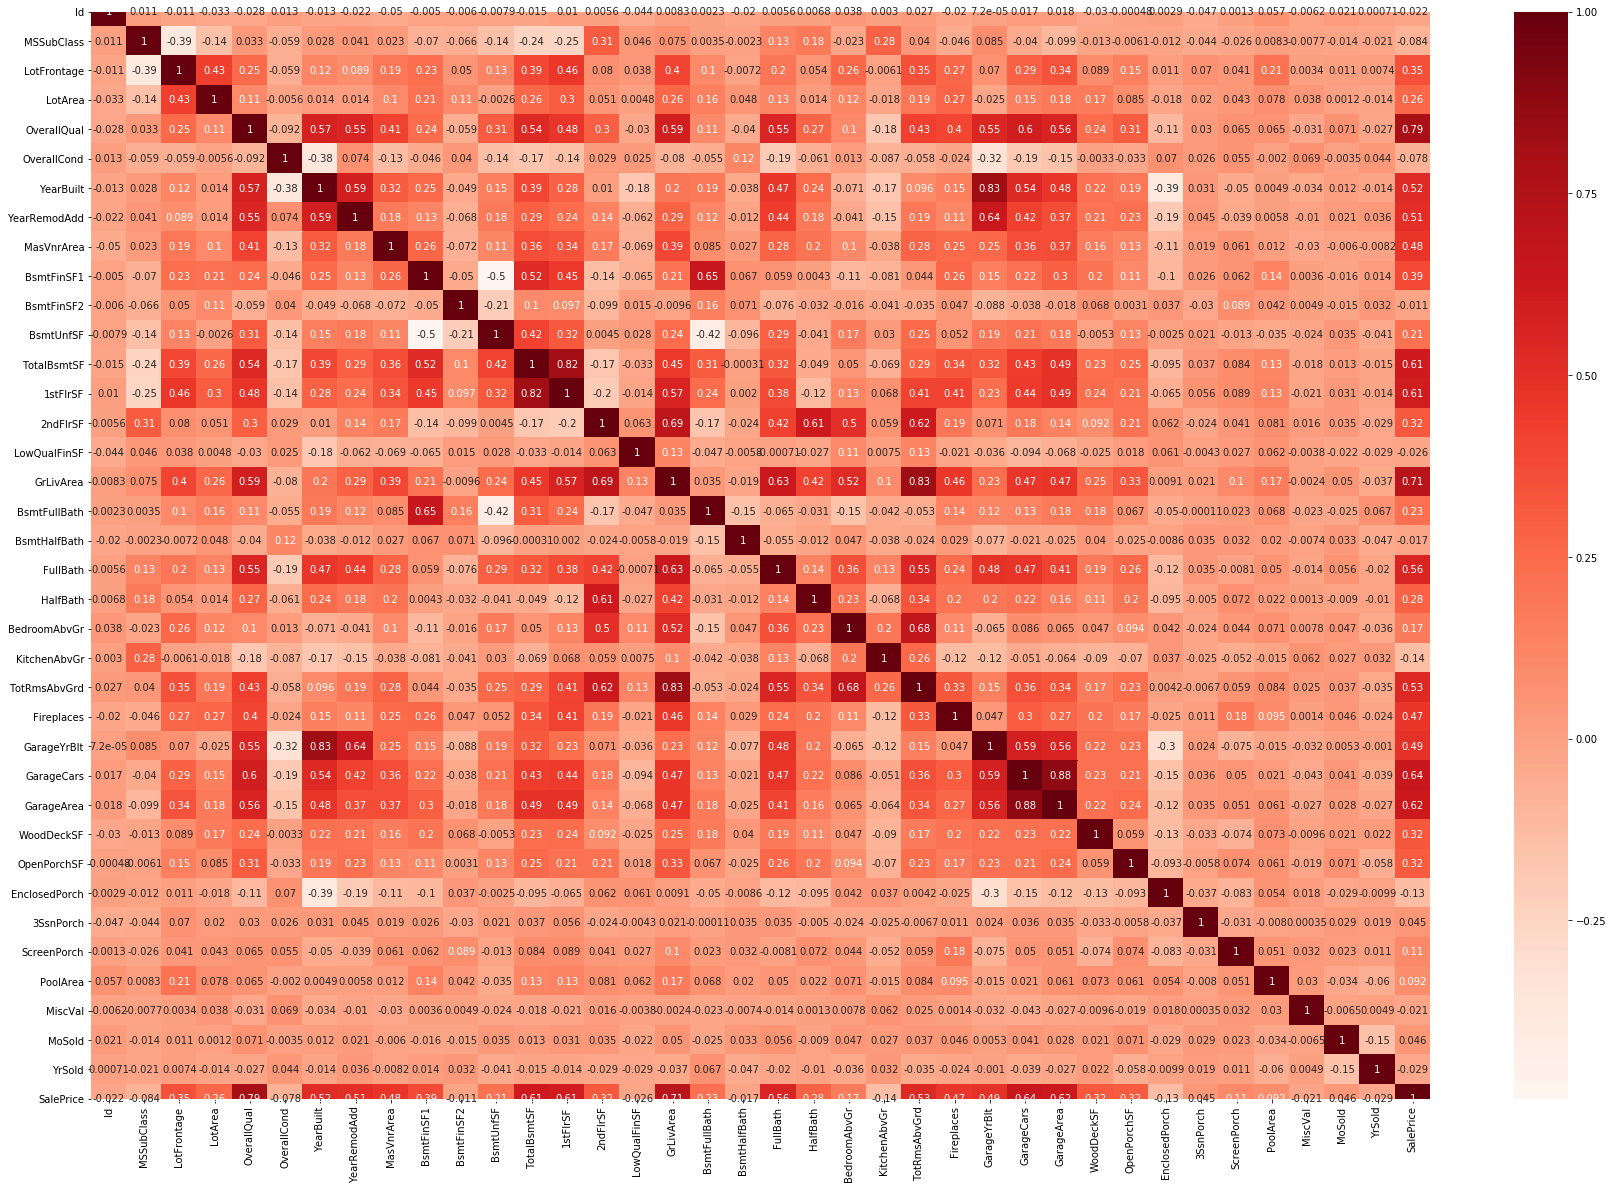

In [76]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()